# 基于卷积神经网络的手写英文字母识别系统研究

In [1]:
from myCnn.cnnWithAttention.utils import *
from myCnn.cnnWithAttention.attentionStructure import *
from myCnn.cnnWithAttention.train_my_cnn import *
import matplotlib.pyplot as plt

## 基本参数设置

In [2]:
ROOT_DIR = "emnist_png_balanced"  # 数据集路径
BATCH_SIZE = 256  # 批大小
EPOCH = 500  # 训练轮数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")# 设备选择
LR = 1e-4  # 学习率

### 加入数据增强

训练集每个类别样本数：
类别 A: 700
类别 B: 700
类别 C: 700
类别 D: 700
类别 E: 700
类别 F: 700
类别 G: 700
类别 H: 700
类别 I: 700
类别 J: 700
类别 K: 700
类别 L: 700
类别 M: 700
类别 N: 700
类别 O: 700
类别 P: 700
类别 Q: 700
类别 R: 700
类别 S: 700
类别 T: 700
类别 U: 700
类别 V: 700
类别 W: 700
类别 X: 700
类别 Y: 700
类别 Z: 700
类别 a_: 700
类别 b_: 700
类别 d_: 700
类别 e_: 700
类别 f_: 700
类别 g_: 700
类别 h_: 700
类别 n_: 700
类别 q_: 700
类别 r_: 700
类别 t_: 700

验证集每个类别样本数：
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150
类别 U: 150
类别 V: 150
类别 W: 150
类别 X: 150
类别 Y: 150
类别 Z: 150
类别 a_: 150
类别 b_: 150
类别 d_: 150
类别 e_: 150
类别 f_: 150
类别 g_: 150
类别 h_: 150
类别 n_: 150
类别 q_: 150
类别 r_: 150
类别 t_: 150

测试集每个类别样本数：
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150


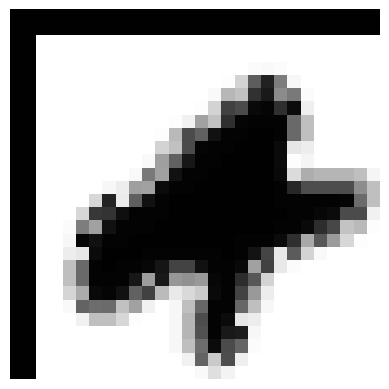

In [3]:
transform = AlbumentationsTransform()  # 使用数据增强

train_loader, val_loader, test_loader1, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader1.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()

### 训练模型（有注意力机制）

CNNWithAttention(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (MaxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (residual): ResidualBlock(
    (conv): Sequential(
      (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

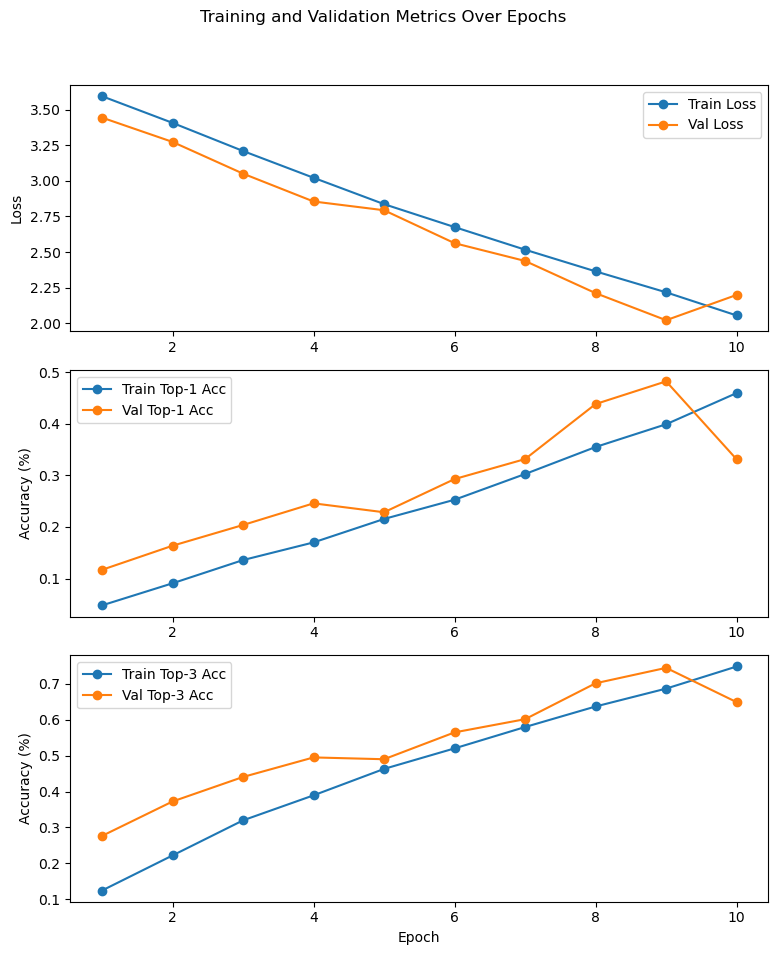

Saved final training metrics plot to training_plots\20250423_231639_training_metrics.png
训练结束。


In [5]:
CNNWithAttention = CNNWithAttention(label_num, use_attention=True) # 调用模型
print(CNNWithAttention)
train_and_validate(
    model=CNNWithAttention,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=10,
    device=device,
    save_path="cnn_res_attention_aug_best.pth",
)

print("训练结束。")

### 训练模型（无注意力机制）

🔍 特征图钩子已注册到: Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


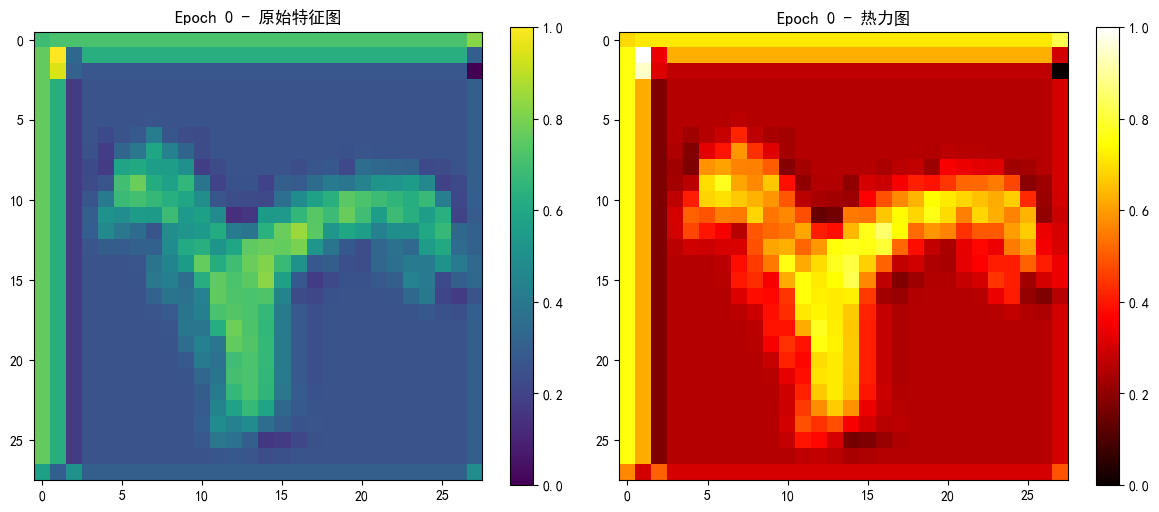

🖼️ 特征图已保存到: runs/20250424_001903\feature_map_epoch_0.png
🎯 新最佳模型 (准确率: 0.1506) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 1/5: Train Loss: 3.5750 | Val Loss: 3.4068 | Train Top-1: 0.0482 | Val Top-1: 0.1506 | Train Top-3: 0.1291 | Val Top-3: 0.3036
Epoch 2/5: Train Loss: 3.3481 | Val Loss: 3.2040 | Train Top-1: 0.1086 | Val Top-1: 0.1503 | Train Top-3: 0.2583 | Val Top-3: 0.3721
🎯 新最佳模型 (准确率: 0.2256) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 3/5: Train Loss: 3.1289 | Val Loss: 2.9691 | Train Top-1: 0.1547 | Val Top-1: 0.2256 | Train Top-3: 0.3599 | Val Top-3: 0.4838
🎯 新最佳模型 (准确率: 0.2351) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 4/5: Train Loss: 2.9370 | Val Loss: 2.8136 | Train Top-1: 0.1938 | Val Top-1: 0.2351 | Train Top-3: 0.4333 | Val Top-3: 0.5074
🎯 新最佳模型 (准确率: 0.3160) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 5/5: Train Loss: 2.7753 | Val Loss: 2.6012 | Train Top-1: 0.2323 | Val Top-1: 0.3160 | Train Top-3: 0.4966 | Val Top-3: 0.6189
✅ 特征图钩子已移除


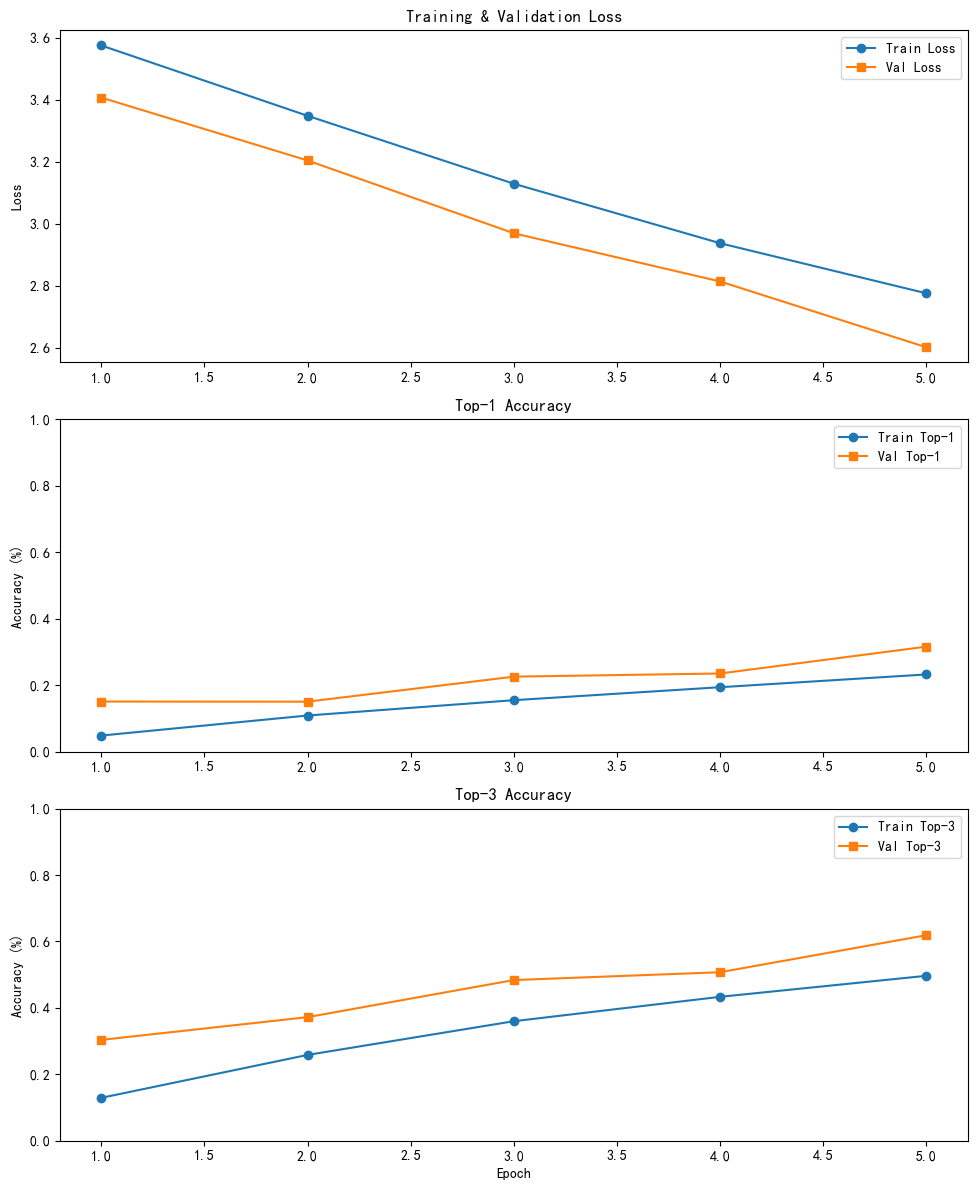

📊 训练图表已保存到: training_plots\training_metrics_20250424_002023.png


CNNWithAttention(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (MaxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (residual): ResidualBlock(
    (conv): Sequential(
      (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [4]:
CNNnoAttention = CNNWithAttention(label_num, use_attention=False) # 调用模型

train_and_validate(
    model=CNNnoAttention,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=5,
    device=device,
    save_path="cnn_res_noattention_aug_best.pth"
)

### 无数据增强

训练集每个类别样本数：
类别 A: 1400
类别 B: 1400
类别 C: 1400
类别 D: 1400
类别 E: 1400
类别 F: 1400
类别 G: 1400
类别 H: 1400
类别 I: 1400
类别 J: 1400
类别 K: 1400
类别 L: 1400
类别 M: 1400
类别 N: 1400
类别 O: 1400
类别 P: 1400
类别 Q: 1400
类别 R: 1400
类别 S: 1400
类别 T: 1400
类别 U: 1400
类别 V: 1400
类别 W: 1400
类别 X: 1400
类别 Y: 1400
类别 Z: 1400
类别 a_: 1400
类别 b_: 1400
类别 d_: 1400
类别 e_: 1400
类别 f_: 1400
类别 g_: 1400
类别 h_: 1400
类别 n_: 1400
类别 q_: 1400
类别 r_: 1400
类别 t_: 1400

验证集每个类别样本数：
类别 A: 300
类别 B: 300
类别 C: 300
类别 D: 300
类别 E: 300
类别 F: 300
类别 G: 300
类别 H: 300
类别 I: 300
类别 J: 300
类别 K: 300
类别 L: 300
类别 M: 300
类别 N: 300
类别 O: 300
类别 P: 300
类别 Q: 300
类别 R: 300
类别 S: 300
类别 T: 300
类别 U: 300
类别 V: 300
类别 W: 300
类别 X: 300
类别 Y: 300
类别 Z: 300
类别 a_: 300
类别 b_: 300
类别 d_: 300
类别 e_: 300
类别 f_: 300
类别 g_: 300
类别 h_: 300
类别 n_: 300
类别 q_: 300
类别 r_: 300
类别 t_: 300

测试集每个类别样本数：
类别 A: 300
类别 B: 300
类别 C: 300
类别 D: 300
类别 E: 300
类别 F: 300
类别 G: 300
类别 H: 300
类别 I: 300
类别 J: 300
类别 K: 300
类别 L: 300
类别 M: 300
类别 N: 300
类别 O: 300
类别 P: 300
类别 

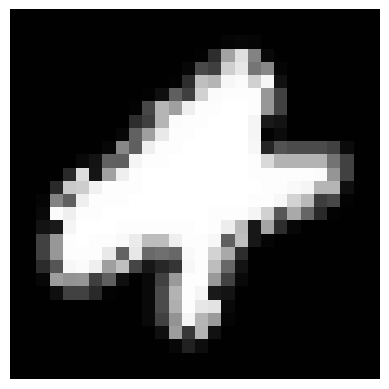

In [6]:
transform = AlbumentationsTransformBase()  # 不使用数据增强


train_loader, val_loader, test_loader2, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42,
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader2.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()

### 训练模型（有注意力机制）

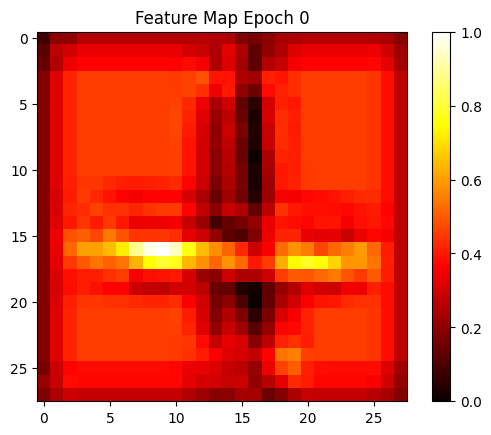

Epoch [1/500] Loss: 3.4355, Train Top-1 Acc: 0.0901, Train Top-3 Acc: 0.2164, Val Top-1 Acc: 0.2001, Val Top-3 Acc: 0.4268
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2001
Epoch [2/500] Loss: 2.9912, Train Top-1 Acc: 0.1943, Train Top-3 Acc: 0.4328, Val Top-1 Acc: 0.3206, Val Top-3 Acc: 0.5875
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.3206
Epoch [3/500] Loss: 2.5930, Train Top-1 Acc: 0.3049, Train Top-3 Acc: 0.5817, Val Top-1 Acc: 0.4403, Val Top-3 Acc: 0.7059
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.4403
Epoch [4/500] Loss: 2.2132, Train Top-1 Acc: 0.4308, Train Top-3 Acc: 0.7240, Val Top-1 Acc: 0.6161, Val Top-3 Acc: 0.8747
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.6161
Epoch [5/500] Loss: 1.8310, Train Top-1 Acc: 0.5674, Train Top-3 Acc: 0.8352, Val Top-1 Acc: 0.7001, Val Top-3 Acc: 0.8985
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7001
Epoch [6/500] Loss: 1.4512, Train Top-1 Acc: 0.6853, Train Top-3 Acc: 0.8985, Val Top-1 Acc: 0.7819, Val Top-3 Acc: 0.9357
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7819
Epoch [7/500] Loss: 1.1215, Train Top-1 Acc: 0.7695, Train

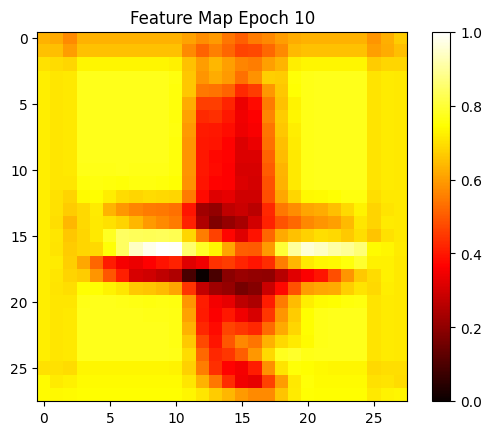

Epoch [11/500] Loss: 0.6184, Train Top-1 Acc: 0.8456, Train Top-3 Acc: 0.9668, Val Top-1 Acc: 0.8220, Val Top-3 Acc: 0.9548
Epoch [12/500] Loss: 0.5662, Train Top-1 Acc: 0.8553, Train Top-3 Acc: 0.9696, Val Top-1 Acc: 0.8623, Val Top-3 Acc: 0.9696
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8623
Epoch [13/500] Loss: 0.5286, Train Top-1 Acc: 0.8598, Train Top-3 Acc: 0.9716, Val Top-1 Acc: 0.8521, Val Top-3 Acc: 0.9702
Epoch [14/500] Loss: 0.4979, Train Top-1 Acc: 0.8625, Train Top-3 Acc: 0.9731, Val Top-1 Acc: 0.8794, Val Top-3 Acc: 0.9764
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8794
Epoch [15/500] Loss: 0.4685, Train Top-1 Acc: 0.8708, Train Top-3 Acc: 0.9750, Val Top-1 Acc: 0.8539, Val Top-3 Acc: 0.9693
Epoch [16/500] Loss: 0.4476, Train Top-1 Acc: 0.8742, Train Top-3 Acc: 0.9767, Val Top-1 Acc: 0.8835, Val Top-3 Acc: 0.9791
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8835
Epoch [17/500] Loss: 0.4297, Train Top-1 Acc: 0.8775, Train Top-3 Acc: 0.9784, Val Top-1 Acc: 0.8756, Val Top-3 Acc: 0.9763
Epoch [18/500] Loss: 0.4129, T

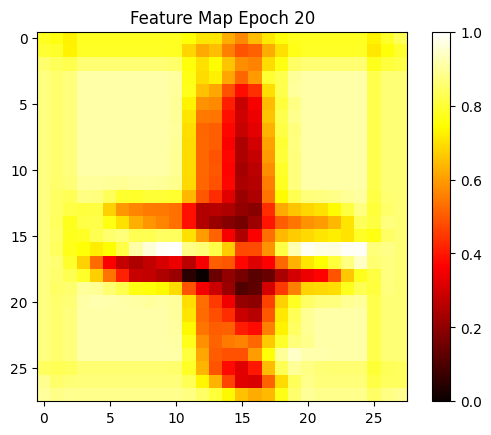

Epoch [21/500] Loss: 0.3724, Train Top-1 Acc: 0.8880, Train Top-3 Acc: 0.9823, Val Top-1 Acc: 0.8910, Val Top-3 Acc: 0.9822
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8910
Epoch [22/500] Loss: 0.3645, Train Top-1 Acc: 0.8898, Train Top-3 Acc: 0.9825, Val Top-1 Acc: 0.8845, Val Top-3 Acc: 0.9803
Epoch [23/500] Loss: 0.3520, Train Top-1 Acc: 0.8928, Train Top-3 Acc: 0.9831, Val Top-1 Acc: 0.8956, Val Top-3 Acc: 0.9821
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8956
Epoch [24/500] Loss: 0.3479, Train Top-1 Acc: 0.8935, Train Top-3 Acc: 0.9832, Val Top-1 Acc: 0.8949, Val Top-3 Acc: 0.9821
Epoch [25/500] Loss: 0.3419, Train Top-1 Acc: 0.8933, Train Top-3 Acc: 0.9839, Val Top-1 Acc: 0.8968, Val Top-3 Acc: 0.9829
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8968
Epoch [26/500] Loss: 0.3351, Train Top-1 Acc: 0.8964, Train Top-3 Acc: 0.9849, Val Top-1 Acc: 0.8888, Val Top-3 Acc: 0.9815
Epoch [27/500] Loss: 0.3286, Train Top-1 Acc: 0.8971, Train Top-3 Acc: 0.9849, Val Top-1 Acc: 0.8960, Val Top-3 Acc: 0.9818
Epoch [28/500] Loss: 0.3224, T

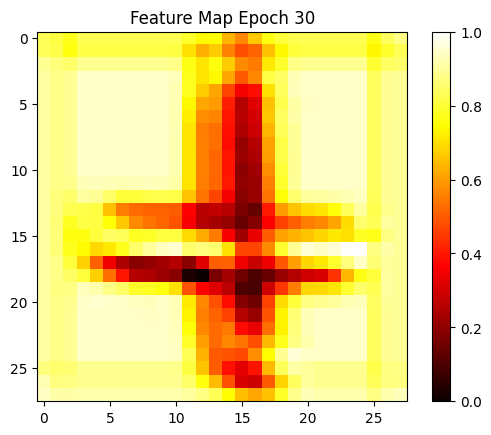

Epoch [31/500] Loss: 0.3081, Train Top-1 Acc: 0.9022, Train Top-3 Acc: 0.9864, Val Top-1 Acc: 0.8998, Val Top-3 Acc: 0.9834
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8998
Epoch [32/500] Loss: 0.3028, Train Top-1 Acc: 0.9031, Train Top-3 Acc: 0.9868, Val Top-1 Acc: 0.9039, Val Top-3 Acc: 0.9842
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9039
Epoch [33/500] Loss: 0.2993, Train Top-1 Acc: 0.9048, Train Top-3 Acc: 0.9870, Val Top-1 Acc: 0.9035, Val Top-3 Acc: 0.9842
Epoch [34/500] Loss: 0.2958, Train Top-1 Acc: 0.9043, Train Top-3 Acc: 0.9868, Val Top-1 Acc: 0.8947, Val Top-3 Acc: 0.9809
Epoch [35/500] Loss: 0.2929, Train Top-1 Acc: 0.9056, Train Top-3 Acc: 0.9878, Val Top-1 Acc: 0.9084, Val Top-3 Acc: 0.9861
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9084
Epoch [36/500] Loss: 0.2873, Train Top-1 Acc: 0.9060, Train Top-3 Acc: 0.9877, Val Top-1 Acc: 0.9025, Val Top-3 Acc: 0.9841
Epoch [37/500] Loss: 0.2853, Train Top-1 Acc: 0.9076, Train Top-3 Acc: 0.9876, Val Top-1 Acc: 0.9050, Val Top-3 Acc: 0.9843
Epoch [38/500] Loss: 0.2824, T

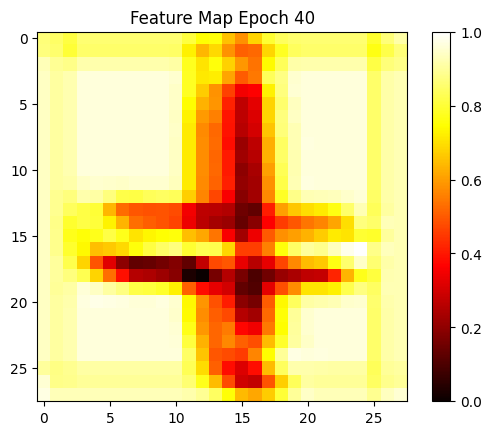

Epoch [41/500] Loss: 0.2747, Train Top-1 Acc: 0.9099, Train Top-3 Acc: 0.9888, Val Top-1 Acc: 0.9068, Val Top-3 Acc: 0.9848
Epoch [42/500] Loss: 0.2717, Train Top-1 Acc: 0.9114, Train Top-3 Acc: 0.9895, Val Top-1 Acc: 0.9103, Val Top-3 Acc: 0.9843
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9103
Epoch [43/500] Loss: 0.2711, Train Top-1 Acc: 0.9128, Train Top-3 Acc: 0.9893, Val Top-1 Acc: 0.9039, Val Top-3 Acc: 0.9825
Epoch [44/500] Loss: 0.2675, Train Top-1 Acc: 0.9125, Train Top-3 Acc: 0.9896, Val Top-1 Acc: 0.9070, Val Top-3 Acc: 0.9856
Epoch [45/500] Loss: 0.2649, Train Top-1 Acc: 0.9139, Train Top-3 Acc: 0.9896, Val Top-1 Acc: 0.9000, Val Top-3 Acc: 0.9823
Epoch [46/500] Loss: 0.2598, Train Top-1 Acc: 0.9149, Train Top-3 Acc: 0.9897, Val Top-1 Acc: 0.8834, Val Top-3 Acc: 0.9811
Epoch [47/500] Loss: 0.2603, Train Top-1 Acc: 0.9141, Train Top-3 Acc: 0.9900, Val Top-1 Acc: 0.8914, Val Top-3 Acc: 0.9829
Epoch [48/500] Loss: 0.2563, Train Top-1 Acc: 0.9158, Train Top-3 Acc: 0.9902, Val Top-1 Acc: 0.91

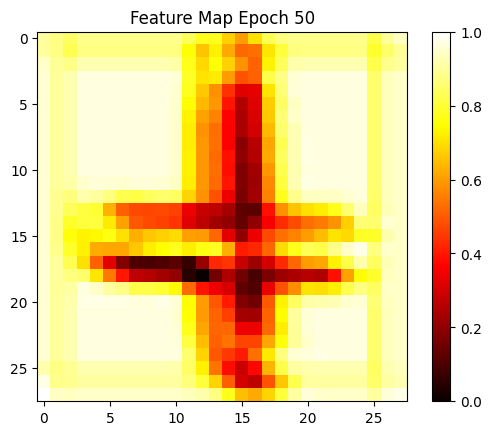

Epoch [51/500] Loss: 0.2512, Train Top-1 Acc: 0.9168, Train Top-3 Acc: 0.9909, Val Top-1 Acc: 0.9096, Val Top-3 Acc: 0.9864
Epoch [52/500] Loss: 0.2519, Train Top-1 Acc: 0.9171, Train Top-3 Acc: 0.9908, Val Top-1 Acc: 0.9093, Val Top-3 Acc: 0.9863
Epoch [53/500] Loss: 0.2452, Train Top-1 Acc: 0.9182, Train Top-3 Acc: 0.9911, Val Top-1 Acc: 0.9110, Val Top-3 Acc: 0.9867
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9110
Epoch [54/500] Loss: 0.2413, Train Top-1 Acc: 0.9191, Train Top-3 Acc: 0.9917, Val Top-1 Acc: 0.9143, Val Top-3 Acc: 0.9876
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.9143
Epoch [55/500] Loss: 0.2431, Train Top-1 Acc: 0.9189, Train Top-3 Acc: 0.9913, Val Top-1 Acc: 0.9009, Val Top-3 Acc: 0.9840
Epoch [56/500] Loss: 0.2429, Train Top-1 Acc: 0.9182, Train Top-3 Acc: 0.9916, Val Top-1 Acc: 0.9043, Val Top-3 Acc: 0.9852
Epoch [57/500] Loss: 0.2430, Train Top-1 Acc: 0.9197, Train Top-3 Acc: 0.9912, Val Top-1 Acc: 0.8986, Val Top-3 Acc: 0.9851
Epoch [58/500] Loss: 0.2394, Train Top-1 Acc: 0.9205, Train Top-

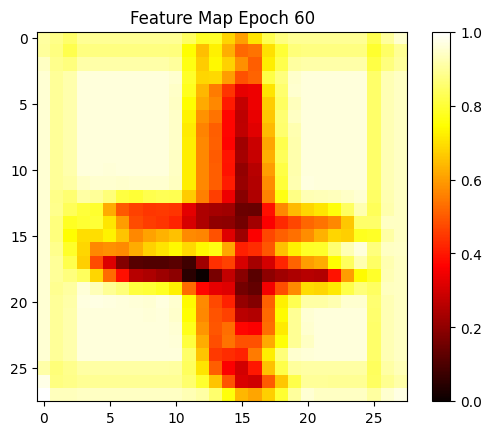

Epoch [61/500] Loss: 0.2332, Train Top-1 Acc: 0.9219, Train Top-3 Acc: 0.9918, Val Top-1 Acc: 0.9066, Val Top-3 Acc: 0.9856
Epoch [62/500] Loss: 0.2304, Train Top-1 Acc: 0.9238, Train Top-3 Acc: 0.9925, Val Top-1 Acc: 0.9074, Val Top-3 Acc: 0.9852
Epoch [63/500] Loss: 0.2265, Train Top-1 Acc: 0.9249, Train Top-3 Acc: 0.9925, Val Top-1 Acc: 0.9028, Val Top-3 Acc: 0.9839
Epoch [64/500] Loss: 0.2290, Train Top-1 Acc: 0.9228, Train Top-3 Acc: 0.9925, Val Top-1 Acc: 0.9006, Val Top-3 Acc: 0.9850
Epoch [65/500] Loss: 0.2319, Train Top-1 Acc: 0.9210, Train Top-3 Acc: 0.9922, Val Top-1 Acc: 0.9123, Val Top-3 Acc: 0.9872
Epoch [66/500] Loss: 0.2270, Train Top-1 Acc: 0.9229, Train Top-3 Acc: 0.9926, Val Top-1 Acc: 0.8924, Val Top-3 Acc: 0.9827
Epoch [67/500] Loss: 0.2259, Train Top-1 Acc: 0.9241, Train Top-3 Acc: 0.9927, Val Top-1 Acc: 0.9107, Val Top-3 Acc: 0.9874
Epoch [68/500] Loss: 0.2198, Train Top-1 Acc: 0.9253, Train Top-3 Acc: 0.9933, Val Top-1 Acc: 0.9117, Val Top-3 Acc: 0.9859
Epoch [6

In [7]:
CNNWithAttention_noBoost = CNNWithAttention(label_num, use_attention=True) # 调用模型

train_and_validate(
    model=CNNWithAttention_noBoost,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_attention_noaug_best.pth",
    lr=LR
)

### 训练模型（无注意力机制）

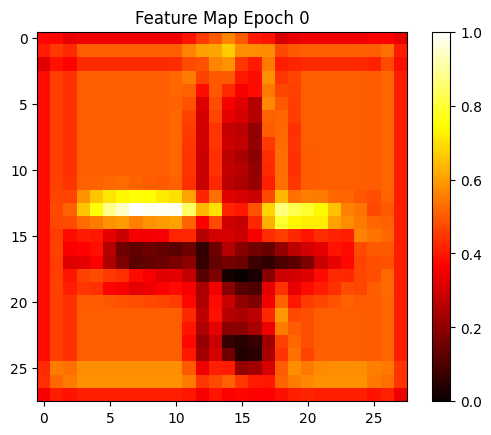

Epoch [1/500] Loss: 3.3887, Train Top-1 Acc: 0.0968, Train Top-3 Acc: 0.2373, Val Top-1 Acc: 0.2212, Val Top-3 Acc: 0.4904
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.2212
Epoch [2/500] Loss: 2.8906, Train Top-1 Acc: 0.2137, Train Top-3 Acc: 0.4691, Val Top-1 Acc: 0.3090, Val Top-3 Acc: 0.5999
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.3090
Epoch [3/500] Loss: 2.5359, Train Top-1 Acc: 0.3111, Train Top-3 Acc: 0.6001, Val Top-1 Acc: 0.4235, Val Top-3 Acc: 0.7390
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.4235
Epoch [4/500] Loss: 2.2426, Train Top-1 Acc: 0.3949, Train Top-3 Acc: 0.6961, Val Top-1 Acc: 0.5550, Val Top-3 Acc: 0.8371
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.5550
Epoch [5/500] Loss: 1.9938, Train Top-1 Acc: 0.4664, Train Top-3 Acc: 0.7631, Val Top-1 Acc: 0.6368, Val Top-3 Acc: 0.8848
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.6368
Epoch [6/500] Loss: 1.7718, Train Top-1 Acc: 0.5341, Train Top-3 Acc: 0.8177, Val Top-1 Acc: 0.7207, Val Top-3 Acc: 0.9172
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.7207
Epoch [7/500] Loss: 1.5809, Train Top-1 Acc: 0.5932, Train

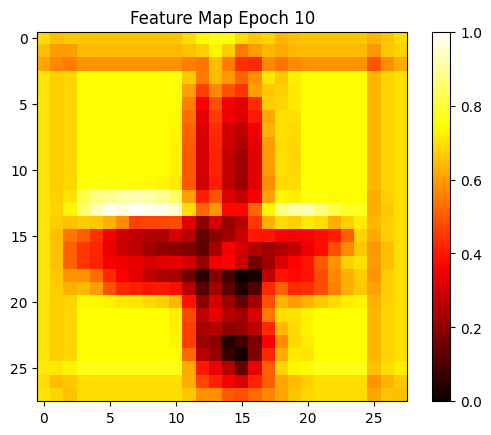

Epoch [11/500] Loss: 1.0937, Train Top-1 Acc: 0.6989, Train Top-3 Acc: 0.9068, Val Top-1 Acc: 0.8167, Val Top-3 Acc: 0.9505
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8167
Epoch [12/500] Loss: 1.0258, Train Top-1 Acc: 0.7119, Train Top-3 Acc: 0.9105, Val Top-1 Acc: 0.8268, Val Top-3 Acc: 0.9547
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8268
Epoch [13/500] Loss: 0.9628, Train Top-1 Acc: 0.7279, Train Top-3 Acc: 0.9187, Val Top-1 Acc: 0.8361, Val Top-3 Acc: 0.9586
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8361
Epoch [14/500] Loss: 0.9099, Train Top-1 Acc: 0.7405, Train Top-3 Acc: 0.9251, Val Top-1 Acc: 0.8490, Val Top-3 Acc: 0.9620
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8490
Epoch [15/500] Loss: 0.8684, Train Top-1 Acc: 0.7486, Train Top-3 Acc: 0.9287, Val Top-1 Acc: 0.8532, Val Top-3 Acc: 0.9622
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8532
Epoch [16/500] Loss: 0.8239, Train Top-1 Acc: 0.7612, Train Top-3 Acc: 0.9327, Val Top-1 Acc: 0.8429, Val Top-3 Acc: 0.9601
Epoch [17/500] Loss: 0.7911, Train Top-1 Acc: 0.7682, Train Top-3 Acc: 0.9371, Val Top

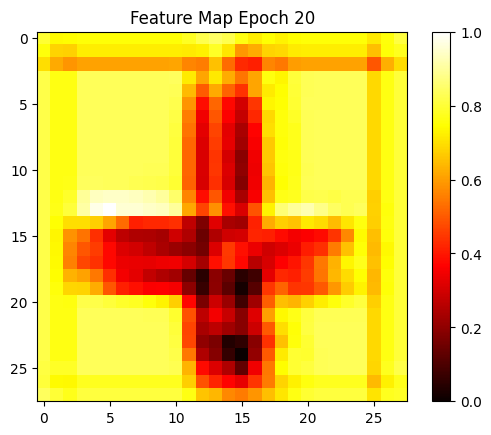

Epoch [21/500] Loss: 0.6851, Train Top-1 Acc: 0.7928, Train Top-3 Acc: 0.9486, Val Top-1 Acc: 0.8679, Val Top-3 Acc: 0.9723
Epoch [22/500] Loss: 0.6675, Train Top-1 Acc: 0.7978, Train Top-3 Acc: 0.9507, Val Top-1 Acc: 0.8744, Val Top-3 Acc: 0.9733
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8744
Epoch [23/500] Loss: 0.6495, Train Top-1 Acc: 0.8030, Train Top-3 Acc: 0.9518, Val Top-1 Acc: 0.8708, Val Top-3 Acc: 0.9727
Epoch [24/500] Loss: 0.6306, Train Top-1 Acc: 0.8072, Train Top-3 Acc: 0.9542, Val Top-1 Acc: 0.8700, Val Top-3 Acc: 0.9734
Epoch [25/500] Loss: 0.6218, Train Top-1 Acc: 0.8105, Train Top-3 Acc: 0.9533, Val Top-1 Acc: 0.8736, Val Top-3 Acc: 0.9759
Epoch [26/500] Loss: 0.6075, Train Top-1 Acc: 0.8138, Train Top-3 Acc: 0.9572, Val Top-1 Acc: 0.8729, Val Top-3 Acc: 0.9756
Epoch [27/500] Loss: 0.5950, Train Top-1 Acc: 0.8160, Train Top-3 Acc: 0.9581, Val Top-1 Acc: 0.8756, Val Top-3 Acc: 0.9750
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8756
Epoch [28/500] Loss: 0.5816, Train Top-1 Acc: 0.8220, Train Top-

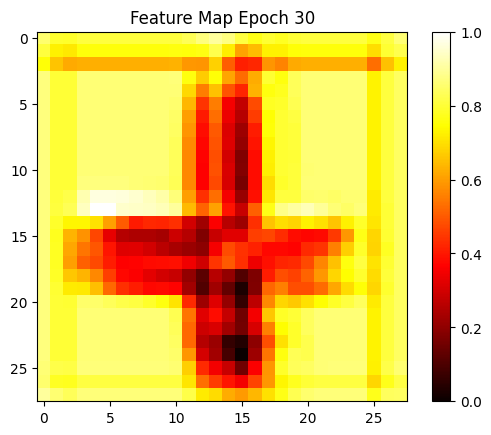

Epoch [31/500] Loss: 0.5520, Train Top-1 Acc: 0.8278, Train Top-3 Acc: 0.9622, Val Top-1 Acc: 0.8858, Val Top-3 Acc: 0.9775
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8858
Epoch [32/500] Loss: 0.5406, Train Top-1 Acc: 0.8320, Train Top-3 Acc: 0.9648, Val Top-1 Acc: 0.8808, Val Top-3 Acc: 0.9759
Epoch [33/500] Loss: 0.5349, Train Top-1 Acc: 0.8342, Train Top-3 Acc: 0.9643, Val Top-1 Acc: 0.8851, Val Top-3 Acc: 0.9771
Epoch [34/500] Loss: 0.5237, Train Top-1 Acc: 0.8378, Train Top-3 Acc: 0.9650, Val Top-1 Acc: 0.8844, Val Top-3 Acc: 0.9799
Epoch [35/500] Loss: 0.5143, Train Top-1 Acc: 0.8408, Train Top-3 Acc: 0.9658, Val Top-1 Acc: 0.8862, Val Top-3 Acc: 0.9794
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8862
Epoch [36/500] Loss: 0.5072, Train Top-1 Acc: 0.8416, Train Top-3 Acc: 0.9668, Val Top-1 Acc: 0.8872, Val Top-3 Acc: 0.9789
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8872
Epoch [37/500] Loss: 0.4946, Train Top-1 Acc: 0.8453, Train Top-3 Acc: 0.9678, Val Top-1 Acc: 0.8882, Val Top-3 Acc: 0.9814
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8

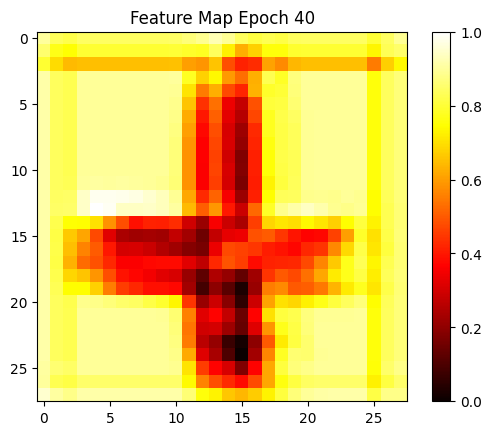

Epoch [41/500] Loss: 0.4803, Train Top-1 Acc: 0.8491, Train Top-3 Acc: 0.9699, Val Top-1 Acc: 0.8935, Val Top-3 Acc: 0.9809
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8935
Epoch [42/500] Loss: 0.4749, Train Top-1 Acc: 0.8513, Train Top-3 Acc: 0.9703, Val Top-1 Acc: 0.8918, Val Top-3 Acc: 0.9808
Epoch [43/500] Loss: 0.4667, Train Top-1 Acc: 0.8516, Train Top-3 Acc: 0.9716, Val Top-1 Acc: 0.8928, Val Top-3 Acc: 0.9823
Epoch [44/500] Loss: 0.4625, Train Top-1 Acc: 0.8558, Train Top-3 Acc: 0.9706, Val Top-1 Acc: 0.8904, Val Top-3 Acc: 0.9791
Epoch [45/500] Loss: 0.4614, Train Top-1 Acc: 0.8541, Train Top-3 Acc: 0.9715, Val Top-1 Acc: 0.8911, Val Top-3 Acc: 0.9814
Epoch [46/500] Loss: 0.4527, Train Top-1 Acc: 0.8573, Train Top-3 Acc: 0.9723, Val Top-1 Acc: 0.8905, Val Top-3 Acc: 0.9812
Epoch [47/500] Loss: 0.4447, Train Top-1 Acc: 0.8613, Train Top-3 Acc: 0.9736, Val Top-1 Acc: 0.8938, Val Top-3 Acc: 0.9815
✅ 新的最佳模型已保存，Val Top-1 Acc: 0.8938
Epoch [48/500] Loss: 0.4422, Train Top-1 Acc: 0.8617, Train Top-

In [ ]:
CNNnoAttention_noBoost = CNNWithAttention(label_num, use_attention=False) # 调用模型

train_and_validate(
    model=CNNnoAttention_noBoost,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_noattention_noaug_best.pth",
    lr=LR
)

In [ ]:
# 模型大小
model_size_CNNwithAttention = sum(p.numel() for p in CNNWithAttention.parameters())
model_size_CNNnoAttention = sum(p.numel() for p in CNNnoAttention.parameters())
model_size_CNNWithAttention_noBoost = sum(p.numel() for p in CNNWithAttention_noBoost.parameters())
model_size_CNNnoAttention_noBoost = sum(p.numel() for p in CNNnoAttention_noBoost.parameters())
# 打印模型大小
print(f"CNNWithAttention: {model_size_CNNwithAttention}")
print(f"CNNnoAttention: {model_size_CNNnoAttention}")
print(f"CNNWithAttention_noBoost: {model_size_CNNWithAttention_noBoost}")
print(f"CNNnoAttention_noBoost: {model_size_CNNnoAttention_noBoost}")

model_sizes = [model_size_CNNwithAttention, model_size_CNNnoAttention, model_size_CNNWithAttention_noBoost,
                 model_size_CNNnoAttention_noBoost]
model_names = ["CNNWithAttention", "CNNnoAttention", "CNNWithAttention_noBoost", "CNNnoAttention_noBoost"]
top1_accs = []
top3_accs = []
inference_speeds = []

In [ ]:
from myCnn.evaluate_model import evaluate_model

# 推理
top1_acc_CNNWithAttention, top3_acc_CNNWithAttention, inference_speed_CNNWithAttention = evaluate_model(
    CNNWithAttention, test_loader1, device)
top1_accs.append(top1_acc_CNNWithAttention)
top3_accs.append(top3_acc_CNNWithAttention)
inference_speeds.append(inference_speed_CNNWithAttention)
print("CNNWithAttention Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNWithAttention:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNWithAttention:.4f}")
print(f"Inference Speed: {inference_speed_CNNWithAttention * 1000:.4f} ms per sample")


In [ ]:
top1_acc_CNNnoAttention, top3_acc_CNNnoAttention, inference_speed_CNNnoAttention = evaluate_model(
    CNNnoAttention, test_loader1, device)
top1_accs.append(top1_acc_CNNnoAttention)
top3_accs.append(top3_acc_CNNnoAttention)
inference_speeds.append(inference_speed_CNNnoAttention)
print("CNNnoAttention Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNnoAttention:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNnoAttention:.4f}")
print(f"Inference Speed: {inference_speed_CNNnoAttention * 1000:.4f} ms per sample")

In [ ]:
top1_acc_CNNWithAttention_noBoost, top3_acc_CNNWithAttention_noBoost, inference_speed_CNNWithAttention_noBoost = evaluate_model(CNNWithAttention_noBoost, test_loader2, device)
top1_accs.append(top1_acc_CNNWithAttention_noBoost)
top3_accs.append(top3_acc_CNNWithAttention_noBoost)
inference_speeds.append(inference_speed_CNNWithAttention_noBoost)
print("CNNWithAttention_noBoost Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNWithAttention_noBoost:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNWithAttention_noBoost:.4f}")
print(f"Inference Speed: {inference_speed_CNNWithAttention_noBoost * 1000:.4f} ms per sample")

In [ ]:
top1_acc_CNNnoAttention_noBoost, top3_acc_CNNnoAttention_noBoost, inference_speed_CNNnoAttention_noBoost = evaluate_model(CNNnoAttention_noBoost, test_loader2, device)
top1_accs.append(top1_acc_CNNnoAttention_noBoost)
top3_accs.append(top3_acc_CNNnoAttention_noBoost)
inference_speeds.append(inference_speed_CNNnoAttention_noBoost)
print("CNNnoAttention_noBoost Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNnoAttention_noBoost:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNnoAttention_noBoost:.4f}")
print(f"Inference Speed: {inference_speed_CNNnoAttention_noBoost * 1000:.4f} ms per sample")

In [ ]:
from myCnn.utils import plot_comparison

plot_comparison(model_names, top1_accs, top3_accs, inference_speeds, model_sizes)